In [7]:
import pandas as pd

df = pd.read_parquet('/content/tles.parquet')
df.head(3)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,3.0,GENERATED VIA SPACE-TRACK.ORG API,2025-11-19T03:20:49,18 SPCS,COSMOS 2584(GLONASS),2025-042A,EARTH,TEME,UTC,SGP4,...,LARGE,CIS,2025-03-02,PKMTR,None,4888721,302955650,0 COSMOS 2584(GLONASS),1 63130U 25042A 25321.97428164 -.00000032 0...,2 63130 64.9630 79.9894 0007392 210.4834 149...
1,3.0,GENERATED VIA SPACE-TRACK.ORG API,2025-11-23T22:56:29,18 SPCS,COSMOS 2516 (GLONASS),2016-032A,EARTH,TEME,UTC,SGP4,...,LARGE,CIS,2016-05-29,PKMTR,None,4896302,303351136,0 COSMOS 2516 (GLONASS),1 41554U 16032A 25327.37338183 .00000062 0...,2 41554 63.8356 198.1246 0015004 194.4973 165...
2,3.0,GENERATED VIA SPACE-TRACK.ORG API,2025-11-22T22:56:46,18 SPCS,GALILEO 6 (262),2014-050B,EARTH,TEME,UTC,SGP4,...,LARGE,ESA,2014-08-22,FRGUI,None,4894345,303271567,0 GALILEO 6 (262),1 40129U 14050B 25326.16354204 -.00000051 0...,2 40129 49.1167 280.9855 1646521 172.2584 190...


In [5]:
for col in df.columns:
  print(col)

CCSDS_OMM_VERS
COMMENT
CREATION_DATE
ORIGINATOR
OBJECT_NAME
OBJECT_ID
CENTER_NAME
REF_FRAME
TIME_SYSTEM
MEAN_ELEMENT_THEORY
EPOCH
MEAN_MOTION
ECCENTRICITY
INCLINATION
RA_OF_ASC_NODE
ARG_OF_PERICENTER
MEAN_ANOMALY
EPHEMERIS_TYPE
CLASSIFICATION_TYPE
NORAD_CAT_ID
ELEMENT_SET_NO
REV_AT_EPOCH
BSTAR
MEAN_MOTION_DOT
MEAN_MOTION_DDOT
SEMIMAJOR_AXIS
PERIOD
APOAPSIS
PERIAPSIS
OBJECT_TYPE
RCS_SIZE
COUNTRY_CODE
LAUNCH_DATE
SITE
DECAY_DATE
FILE
GP_ID
TLE_LINE0
TLE_LINE1
TLE_LINE2


GNSS TLE DATA EXPLORATION SUMMARY

📊 Dataset Shape: 145 rows × 40 columns
📅 Date Range: 2025-05-22 21:01:35.713920 to 2025-11-24 04:55:50.788416

🛰️  GNSS Constellation Breakdown:
   GPS: 19 satellites
   GLONASS: 31 satellites
   GALILEO: 31 satellites
   BEIDOU: 52 satellites
   QZSS: 1 satellites
   Other: 11 satellites

🌍 Country Distribution:
   PRC: 58 objects
   CIS: 31 objects
   ESA: 31 objects
   US: 19 objects
   JPN: 6 objects

🔭 Orbital Characteristics:
   Semimajor Axis: 30435.91 km (mean)
   Inclination: 52.07° (mean)
   Eccentricity: 0.005910 (mean)
   Orbital Period: 893.48 minutes (mean)

🔍 ORBITAL CLUSTERING ANALYSIS

📍 Found 12 orbital clusters with 2+ satellites

Top 5 clusters:

   Cluster 1: 35 satellites
      Semimajor Axis: (27565.973, 28595.542]
      Inclination: (52.472, 56.842]

   Cluster 2: 31 satellites
      Semimajor Axis: (25486.244, 26536.404]
      Inclination: (61.212, 65.583]

   Cluster 3: 19 satellites
      Semimajor Axis: (28595.542, 29625.11

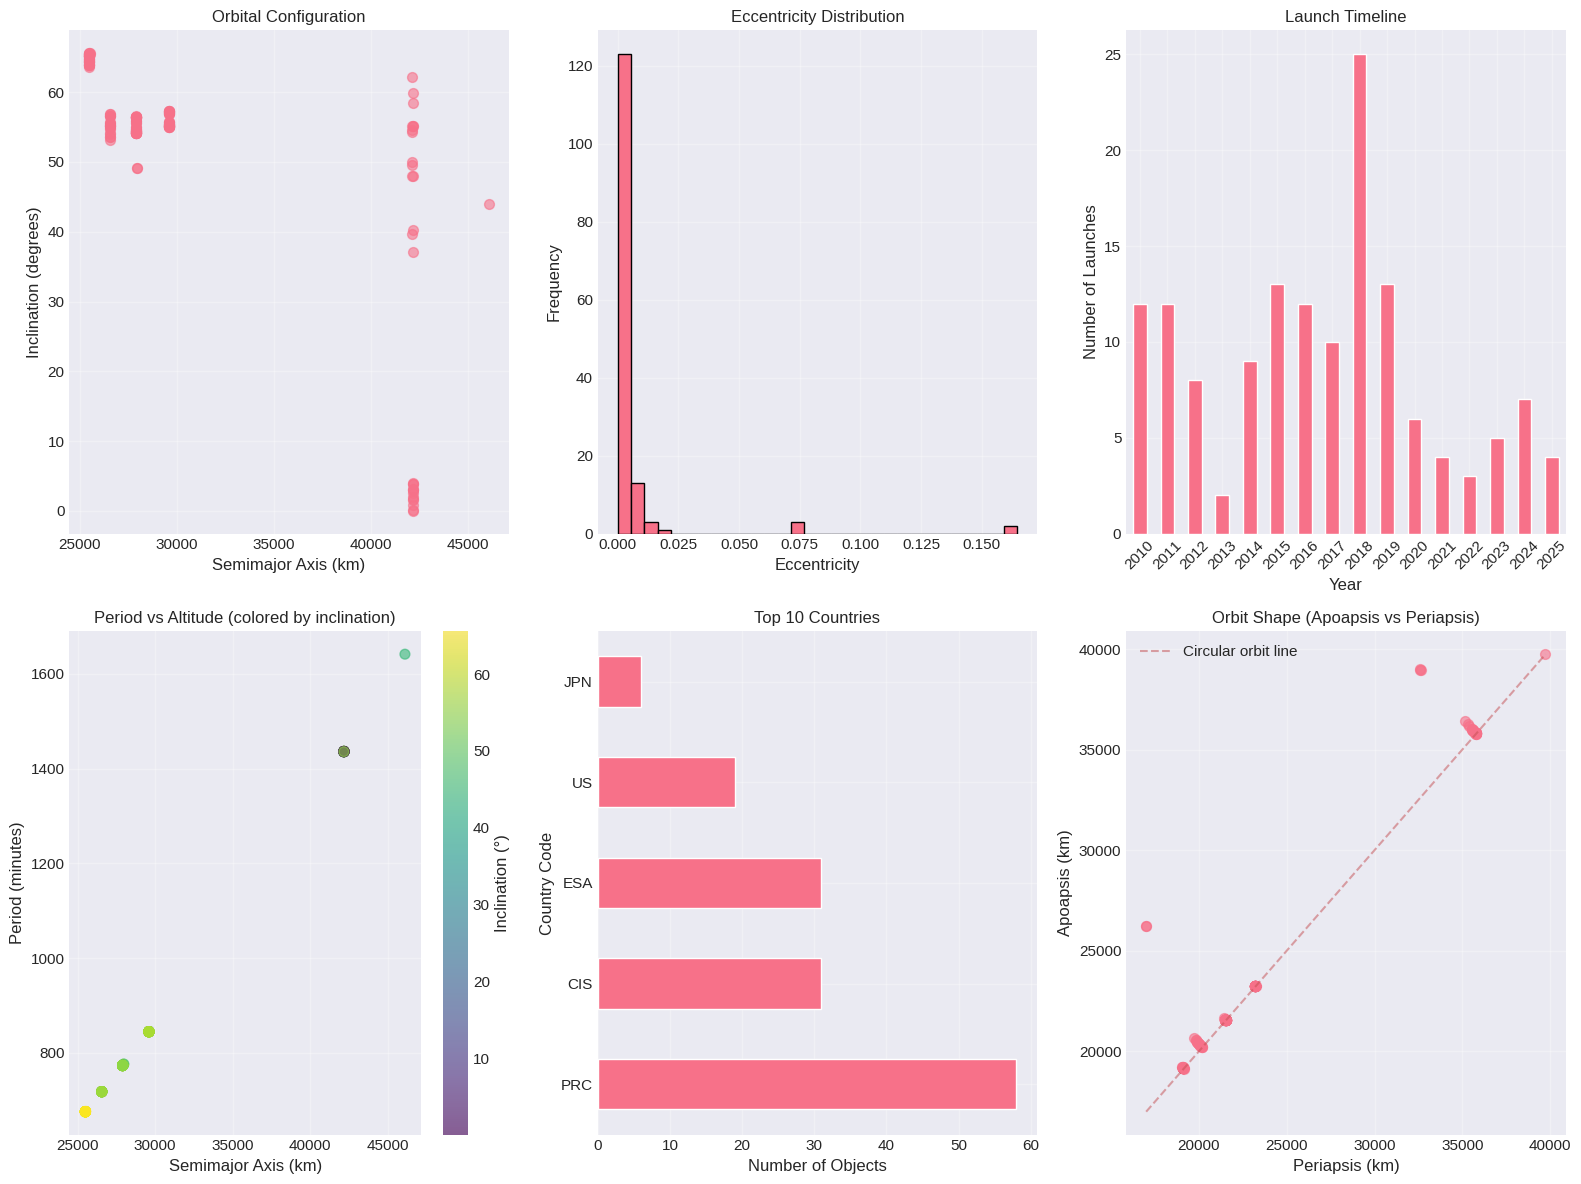

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class GNSSTLEExplorer:
    """Explore GNSS TLE data for interesting patterns and connections"""

    def __init__(self, df):
        self.df = df.copy()
        self._preprocess_data()

    def _preprocess_data(self):
        """Preprocess and clean the data"""
        # Convert date columns to datetime
        date_cols = ['CREATION_DATE', 'EPOCH', 'LAUNCH_DATE', 'DECAY_DATE']
        for col in date_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_datetime(self.df[col], errors='coerce')

        # Convert numeric columns
        numeric_cols = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION',
                       'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
                       'BSTAR', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS',
                       'PERIAPSIS', 'REV_AT_EPOCH']

        for col in numeric_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

    def summary_statistics(self):
        """Generate comprehensive summary statistics"""
        print("="*80)
        print("GNSS TLE DATA EXPLORATION SUMMARY")
        print("="*80)

        print(f"\n📊 Dataset Shape: {self.df.shape[0]} rows × {self.df.shape[1]} columns")
        print(f"📅 Date Range: {self.df['EPOCH'].min()} to {self.df['EPOCH'].max()}")

        # Constellation breakdown
        if 'OBJECT_NAME' in self.df.columns:
            print("\n🛰️  GNSS Constellation Breakdown:")
            constellations = self._identify_constellations()
            for const, count in constellations.items():
                print(f"   {const}: {count} satellites")

        # Country distribution
        if 'COUNTRY_CODE' in self.df.columns:
            print("\n🌍 Country Distribution:")
            top_countries = self.df['COUNTRY_CODE'].value_counts().head(10)
            for country, count in top_countries.items():
                print(f"   {country}: {count} objects")

        # Orbital characteristics
        print("\n🔭 Orbital Characteristics:")
        if 'SEMIMAJOR_AXIS' in self.df.columns:
            print(f"   Semimajor Axis: {self.df['SEMIMAJOR_AXIS'].mean():.2f} km (mean)")
        if 'INCLINATION' in self.df.columns:
            print(f"   Inclination: {self.df['INCLINATION'].mean():.2f}° (mean)")
        if 'ECCENTRICITY' in self.df.columns:
            print(f"   Eccentricity: {self.df['ECCENTRICITY'].mean():.6f} (mean)")
        if 'PERIOD' in self.df.columns:
            print(f"   Orbital Period: {self.df['PERIOD'].mean():.2f} minutes (mean)")

    def _identify_constellations(self):
        """Identify GNSS constellations from object names"""
        constellations = {
            'GPS': 0, 'GLONASS': 0, 'GALILEO': 0, 'BEIDOU': 0,
            'QZSS': 0, 'IRNSS/NavIC': 0, 'SBAS': 0, 'Other': 0
        }

        for name in self.df['OBJECT_NAME'].dropna():
            name_upper = str(name).upper()
            if 'GPS' in name_upper or 'NAVSTAR' in name_upper:
                constellations['GPS'] += 1
            elif 'GLONASS' in name_upper or 'COSMOS' in name_upper:
                constellations['GLONASS'] += 1
            elif 'GALILEO' in name_upper or 'GSAT' in name_upper:
                constellations['GALILEO'] += 1
            elif 'BEIDOU' in name_upper or 'BEIDOU' in name_upper:
                constellations['BEIDOU'] += 1
            elif 'QZSS' in name_upper or 'MICHIBIKI' in name_upper:
                constellations['QZSS'] += 1
            elif 'IRNSS' in name_upper or 'NAVIC' in name_upper:
                constellations['IRNSS/NavIC'] += 1
            elif any(x in name_upper for x in ['SBAS', 'WAAS', 'EGNOS', 'GAGAN', 'MSAS']):
                constellations['SBAS'] += 1
            else:
                constellations['Other'] += 1

        return {k: v for k, v in constellations.items() if v > 0}

    def find_orbital_clusters(self):
        """Find satellites with similar orbital parameters"""
        print("\n" + "="*80)
        print("🔍 ORBITAL CLUSTERING ANALYSIS")
        print("="*80)

        required_cols = ['SEMIMAJOR_AXIS', 'INCLINATION', 'ECCENTRICITY']
        if not all(col in self.df.columns for col in required_cols):
            print("Missing required orbital parameters")
            return

        # Group by similar orbital parameters
        df_orb = self.df.dropna(subset=required_cols)

        # Define tolerance for clustering
        sma_bins = pd.cut(df_orb['SEMIMAJOR_AXIS'], bins=20)
        inc_bins = pd.cut(df_orb['INCLINATION'], bins=15)

        clusters = df_orb.groupby([sma_bins, inc_bins]).size()
        clusters = clusters[clusters > 1].sort_values(ascending=False)

        print(f"\n📍 Found {len(clusters)} orbital clusters with 2+ satellites")
        print("\nTop 5 clusters:")
        for idx, (params, count) in enumerate(clusters.head().items(), 1):
            sma_range, inc_range = params
            print(f"\n   Cluster {idx}: {count} satellites")
            print(f"      Semimajor Axis: {sma_range}")
            print(f"      Inclination: {inc_range}")

    def analyze_launch_trends(self):
        """Analyze launch dates and trends"""
        print("\n" + "="*80)
        print("🚀 LAUNCH TRENDS ANALYSIS")
        print("="*80)

        if 'LAUNCH_DATE' not in self.df.columns:
            print("Launch date information not available")
            return

        df_launch = self.df.dropna(subset=['LAUNCH_DATE'])

        # Launches by year
        df_launch['LAUNCH_YEAR'] = df_launch['LAUNCH_DATE'].dt.year
        launches_by_year = df_launch['LAUNCH_YEAR'].value_counts().sort_index()

        print(f"\n📈 Launch activity from {launches_by_year.index.min()} to {launches_by_year.index.max()}")
        print(f"   Total launches: {len(df_launch)}")
        print(f"   Peak year: {launches_by_year.idxmax()} ({launches_by_year.max()} launches)")
        print(f"   Average per year: {launches_by_year.mean():.1f}")

        # Recent launches (last 5 years)
        recent = df_launch[df_launch['LAUNCH_YEAR'] >= launches_by_year.index.max() - 4]
        print(f"\n📅 Recent launches (last 5 years): {len(recent)}")

    def find_unusual_orbits(self):
        """Identify satellites with unusual orbital characteristics"""
        print("\n" + "="*80)
        print("🌟 UNUSUAL ORBIT DETECTION")
        print("="*80)

        # High eccentricity orbits
        if 'ECCENTRICITY' in self.df.columns:
            high_ecc = self.df[self.df['ECCENTRICITY'] > 0.01]
            if len(high_ecc) > 0:
                print(f"\n⭕ High Eccentricity Orbits (e > 0.01): {len(high_ecc)} satellites")
                for _, row in high_ecc.nlargest(3, 'ECCENTRICITY').iterrows():
                    print(f"   - {row['OBJECT_NAME']}: e = {row['ECCENTRICITY']:.6f}")

        # Unusual inclinations
        if 'INCLINATION' in self.df.columns:
            mean_inc = self.df['INCLINATION'].mean()
            std_inc = self.df['INCLINATION'].std()
            unusual_inc = self.df[abs(self.df['INCLINATION'] - mean_inc) > 2 * std_inc]

            if len(unusual_inc) > 0:
                print(f"\n📐 Unusual Inclinations (>2σ from mean): {len(unusual_inc)} satellites")
                for _, row in unusual_inc.head(3).iterrows():
                    print(f"   - {row['OBJECT_NAME']}: {row['INCLINATION']:.2f}°")

        # Very high or low altitudes
        if 'SEMIMAJOR_AXIS' in self.df.columns:
            mean_sma = self.df['SEMIMAJOR_AXIS'].mean()
            high_alt = self.df[self.df['SEMIMAJOR_AXIS'] > mean_sma * 1.5]

            if len(high_alt) > 0:
                print(f"\n🛸 High Altitude Orbits (>1.5× mean): {len(high_alt)} satellites")
                for _, row in high_alt.nlargest(3, 'SEMIMAJOR_AXIS').iterrows():
                    print(f"   - {row['OBJECT_NAME']}: {row['SEMIMAJOR_AXIS']:.2f} km")

    def correlation_analysis(self):
        """Analyze correlations between orbital parameters"""
        print("\n" + "="*80)
        print("📊 CORRELATION ANALYSIS")
        print("="*80)

        orbital_params = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION',
                         'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS']

        available_params = [p for p in orbital_params if p in self.df.columns]

        if len(available_params) < 2:
            print("Insufficient orbital parameters for correlation analysis")
            return

        corr_matrix = self.df[available_params].corr()

        print("\n🔗 Strong correlations (|r| > 0.7):")
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    param1 = corr_matrix.columns[i]
                    param2 = corr_matrix.columns[j]
                    print(f"   {param1} ↔ {param2}: r = {corr_val:.3f}")

    def temporal_patterns(self):
        """Analyze temporal patterns in the data"""
        print("\n" + "="*80)
        print("⏰ TEMPORAL PATTERNS")
        print("="*80)

        if 'EPOCH' not in self.df.columns:
            print("Epoch information not available")
            return

        df_time = self.df.dropna(subset=['EPOCH'])

        # Time span coverage
        time_span = (df_time['EPOCH'].max() - df_time['EPOCH'].min()).days
        print(f"\n📅 Epoch time span: {time_span} days ({time_span/365.25:.1f} years)")

        # Data freshness
        if 'CREATION_DATE' in self.df.columns:
            df_created = self.df.dropna(subset=['CREATION_DATE'])
            most_recent = df_created['CREATION_DATE'].max()
            print(f"📝 Most recent TLE creation: {most_recent}")

            # Age distribution
            df_created['AGE_DAYS'] = (pd.Timestamp.now() - df_created['CREATION_DATE']).dt.days
            print(f"   Average TLE age: {df_created['AGE_DAYS'].mean():.1f} days")

    def object_type_analysis(self):
        """Analyze object types and classifications"""
        print("\n" + "="*80)
        print("🏷️  OBJECT CLASSIFICATION")
        print("="*80)

        if 'OBJECT_TYPE' in self.df.columns:
            print("\n📋 Object Types:")
            obj_types = self.df['OBJECT_TYPE'].value_counts()
            for obj_type, count in obj_types.items():
                print(f"   {obj_type}: {count}")

        if 'CLASSIFICATION_TYPE' in self.df.columns:
            print("\n🔐 Classification Types:")
            class_types = self.df['CLASSIFICATION_TYPE'].value_counts()
            for class_type, count in class_types.items():
                print(f"   {class_type}: {count}")

        if 'RCS_SIZE' in self.df.columns:
            print("\n📏 RCS Size Distribution:")
            rcs_dist = self.df['RCS_SIZE'].value_counts()
            for rcs, count in rcs_dist.items():
                print(f"   {rcs}: {count}")

    def generate_visualizations(self):
        """Generate comprehensive visualizations"""
        fig = plt.figure(figsize=(16, 12))

        # 1. Inclination vs Semimajor Axis scatter
        ax1 = plt.subplot(2, 3, 1)
        if 'INCLINATION' in self.df.columns and 'SEMIMAJOR_AXIS' in self.df.columns:
            plt.scatter(self.df['SEMIMAJOR_AXIS'], self.df['INCLINATION'],
                       alpha=0.6, s=50)
            plt.xlabel('Semimajor Axis (km)')
            plt.ylabel('Inclination (degrees)')
            plt.title('Orbital Configuration')
            plt.grid(True, alpha=0.3)

        # 2. Eccentricity distribution
        ax2 = plt.subplot(2, 3, 2)
        if 'ECCENTRICITY' in self.df.columns:
            self.df['ECCENTRICITY'].hist(bins=30, edgecolor='black')
            plt.xlabel('Eccentricity')
            plt.ylabel('Frequency')
            plt.title('Eccentricity Distribution')
            plt.grid(True, alpha=0.3)

        # 3. Launch timeline
        ax3 = plt.subplot(2, 3, 3)
        if 'LAUNCH_DATE' in self.df.columns:
            df_launch = self.df.dropna(subset=['LAUNCH_DATE'])
            df_launch['LAUNCH_YEAR'] = df_launch['LAUNCH_DATE'].dt.year
            launches = df_launch['LAUNCH_YEAR'].value_counts().sort_index()
            launches.plot(kind='bar')
            plt.xlabel('Year')
            plt.ylabel('Number of Launches')
            plt.title('Launch Timeline')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)

        # 4. Period vs Altitude
        ax4 = plt.subplot(2, 3, 4)
        if 'PERIOD' in self.df.columns and 'SEMIMAJOR_AXIS' in self.df.columns:
            plt.scatter(self.df['SEMIMAJOR_AXIS'], self.df['PERIOD'],
                       alpha=0.6, s=50, c=self.df['INCLINATION'], cmap='viridis')
            plt.xlabel('Semimajor Axis (km)')
            plt.ylabel('Period (minutes)')
            plt.title('Period vs Altitude (colored by inclination)')
            plt.colorbar(label='Inclination (°)')
            plt.grid(True, alpha=0.3)

        # 5. Country distribution
        ax5 = plt.subplot(2, 3, 5)
        if 'COUNTRY_CODE' in self.df.columns:
            top_countries = self.df['COUNTRY_CODE'].value_counts().head(10)
            top_countries.plot(kind='barh')
            plt.xlabel('Number of Objects')
            plt.ylabel('Country Code')
            plt.title('Top 10 Countries')
            plt.grid(True, alpha=0.3)

        # 6. Apoapsis vs Periapsis
        ax6 = plt.subplot(2, 3, 6)
        if 'APOAPSIS' in self.df.columns and 'PERIAPSIS' in self.df.columns:
            plt.scatter(self.df['PERIAPSIS'], self.df['APOAPSIS'],
                       alpha=0.6, s=50)
            plt.xlabel('Periapsis (km)')
            plt.ylabel('Apoapsis (km)')
            plt.title('Orbit Shape (Apoapsis vs Periapsis)')
            plt.plot([self.df['PERIAPSIS'].min(), self.df['APOAPSIS'].max()],
                    [self.df['PERIAPSIS'].min(), self.df['APOAPSIS'].max()],
                    'r--', alpha=0.5, label='Circular orbit line')
            plt.legend()
            plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('gnss_tle_exploration.png', dpi=300, bbox_inches='tight')
        print("\n📊 Visualizations saved as 'gnss_tle_exploration.png'")
        plt.show()

    def full_exploration(self):
        """Run complete exploration suite"""
        self.summary_statistics()
        self.find_orbital_clusters()
        self.analyze_launch_trends()
        self.find_unusual_orbits()
        self.correlation_analysis()
        self.temporal_patterns()
        self.object_type_analysis()

        print("\n" + "="*80)
        print("✅ EXPLORATION COMPLETE")
        print("="*80)
        print("\nGenerating visualizations...")
        self.generate_visualizations()

df = pd.read_parquet('/content/tles.parquet')
explorer = GNSSTLEExplorer(df)
explorer.full_exploration()